In [5]:
import seaborn
import numpy as np
import torch
from torchmetrics import ConfusionMatrix
from torchmetrics.classification import BinaryAccuracy

from project.pipeline.balance_data import balance_data_indices_reduction
from project.pipeline.data_loader import DataLoader

In [6]:
df_data = DataLoader().df
balanced_df_indices = balance_data_indices_reduction(df_data['label_sexist'])

In [7]:
target = df_data['label_sexist']
target = torch.tensor(np.array([entry != "not sexist" for entry in target]))
predictions = torch.zeros(len(target))

In [8]:
accuracy_metric = BinaryAccuracy()
confusion_matrix_metric = ConfusionMatrix(num_classes=2)
labels = ["not sexist", "sexist"]

Accuracy on whole dataset with prediction for everything 'non-sexist': 0.7572857141494751


<AxesSubplot: >

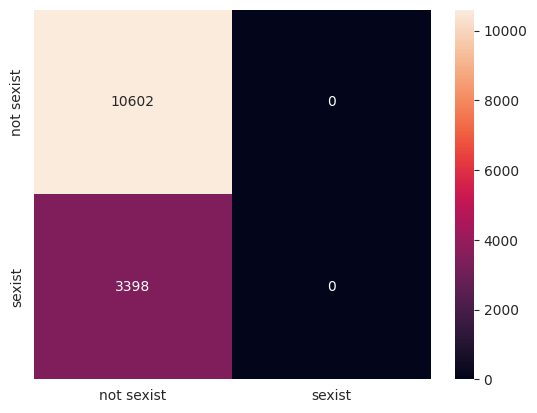

In [11]:
acc = accuracy_metric(predictions, target)
mat = confusion_matrix_metric(predictions, target)
print(f"Accuracy on whole dataset with prediction for everything 'non-sexist': {acc}")
seaborn.heatmap(mat, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)

Accuracy on balanced dataset with prediction for everything 'non-sexist': 0.5


<AxesSubplot: >

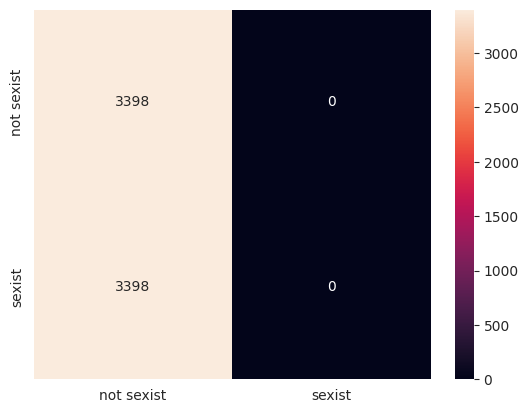

In [14]:
acc = accuracy_metric(predictions[balanced_df_indices], target[balanced_df_indices])
mat = confusion_matrix_metric(predictions[balanced_df_indices], target[balanced_df_indices])
print(f"Accuracy on balanced dataset with prediction for everything 'non-sexist': {acc}")
seaborn.heatmap(mat, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)